In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from IPython.display import display, display_html
from sklearn.dummy import DummyClassifier


## Acquire

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import acquire

In [3]:
# Acquire
# Create function to retrieve telco_churn data
telco = acquire.get_telco_churn_data()

   

In [4]:
# Create a function that retrieves the necessary connection URL.

def get_connection(db_name):
    """
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    """
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'


In [5]:
# Create function to retrieve telco_churn data
def get_telco_churn_data():
    """
    This function reads in the Telco Churn data from the Codeup db
    and returns a pandas DataFrame with all columns.
    """
    filename = 'telco.csv'

    if os.path.isfile(filename):
        return pd.read_csv(filename)

    else:
        sql = '''
                SELECT *
                FROM customers
                JOIN payment_types USING (payment_type_id)
                JOIN contract_types USING (contract_type_id)
                JOIN internet_service_types USING (internet_service_type_id);
                '''

        df = pd.read_sql(sql, get_connection('telco_churn'))

        df.to_csv(filename, index=False)

        return df


_________

## Prepare

In [6]:
#Import prepare functions
import prepare

In [7]:
def prep_telco_churn(df):
    '''
    This function takes in the DataFrame from get_telco_churn_data
    and returns the DataFrame with preprocessing applied 
    '''
    # Drop duplicated columns and rows
    df = df.loc[:, ~df.columns.duplicated()]
    df.drop_duplicates(inplace=True)

    # Replace ' ' in 'total_charges' column with '0' and change its data type to float
    df.total_charges = df.total_charges.replace(' ', '0').astype(float)

    # Change data type for boolean columns
    for col in ['churn', 'partner', 'dependents', 'phone_service']:
        df[col] = df[col].map({'No': 0, 'Yes': 1})

    return df

In [8]:
def split_data(df):
    '''
    This function takes in a DataFrame and returns train, validate, and test DataFrames.
    '''
    # Create train_validate and test datasets
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.churn)

    # Split train_validate into train and validate datasets
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate.churn)

    return train, validate, test


In [9]:
# To inspect the first few rows of the DataFrame, you can use the head functiotelco.head()
telco.head()

   

,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,Mailed check,One year,DSL
1,1,1,2,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Mailed check,Month-to-month,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Electronic check,Month-to-month,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Electronic check,Month-to-month,Fiber optic
4,2,1,2,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Mailed check,Month-to-month,Fiber optic


_________________

## Explore 

In [10]:
# Change the name of the data to 'telco'
telco = prep_telco_churn(telco)

In [11]:
prep_telco_churn(telco)

,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,NaN,NaN,9,NaN,...,Yes,Yes,No,Yes,65.60,593.30,NaN,Mailed check,One year,DSL
1,1,1,2,0003-MKNFE,Male,0,NaN,NaN,9,NaN,...,No,No,Yes,No,59.90,542.40,NaN,Mailed check,Month-to-month,DSL
2,2,1,1,0004-TLHLJ,Male,0,NaN,NaN,4,NaN,...,No,No,No,Yes,73.90,280.85,NaN,Electronic check,Month-to-month,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,NaN,NaN,13,NaN,...,No,Yes,Yes,Yes,98.00,1237.85,NaN,Electronic check,Month-to-month,Fiber optic
4,2,1,2,0013-EXCHZ,Female,1,NaN,NaN,3,NaN,...,Yes,Yes,No,Yes,83.90,267.40,NaN,Mailed check,Month-to-month,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,2,2,9987-LUTYD,Female,0,NaN,NaN,13,NaN,...,Yes,No,No,No,55.15,742.90,NaN,Mailed check,One year,DSL
7039,2,1,1,9992-RRAMN,Male,0,NaN,NaN,22,NaN,...,No,No,Yes,Yes,85.10,1873.70,NaN,Electronic check,Month-to-month,Fiber optic
7040,1,1,2,9992-UJOEL,Male,0,NaN,NaN,2,NaN,...,No,No,No,Yes,50.30,92.75,NaN,Mailed check,Month-to-month,DSL
7041,1,3,2,9993-LHIEB,Male,0,NaN,NaN,67,NaN,...,Yes,No,Yes,No,67.85,4627.65,NaN,Mailed check,Two year,DSL


In [12]:
# Review the data
telco.head()

,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,1,1,9,1,...,Yes,Yes,No,Yes,65.6,593.30,0,Mailed check,One year,DSL
1,1,1,2,0003-MKNFE,Male,0,0,0,9,1,...,No,No,Yes,No,59.9,542.40,0,Mailed check,Month-to-month,DSL
2,2,1,1,0004-TLHLJ,Male,0,0,0,4,1,...,No,No,No,Yes,73.9,280.85,1,Electronic check,Month-to-month,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,1,0,13,1,...,No,Yes,Yes,Yes,98.0,1237.85,1,Electronic check,Month-to-month,Fiber optic
4,2,1,2,0013-EXCHZ,Female,1,1,0,3,1,...,Yes,Yes,No,Yes,83.9,267.40,1,Mailed check,Month-to-month,Fiber optic


In [13]:
#The data types in this dataset are integers and object.
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   payment_type_id           7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   int64  
 7   dependents                7043 non-null   int64  
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   int64  
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

### Data Summary
- 13 object data types
- 9 integer data types
- 2 float data type
- 0 null values


In [14]:
# Summary of the statistical properties of telco dataset
telco.describe()

,internet_service_type_id,contract_type_id,payment_type_id,senior_citizen,partner,dependents,tenure,phone_service,monthly_charges,total_charges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.872923,1.690473,2.315633,0.162147,0.483033,0.299588,32.371149,0.903166,64.761692,2279.734304,0.265370
std,0.737796,0.833755,1.148907,0.368612,0.499748,0.458110,24.559481,0.295752,30.090047,2266.794470,0.441561
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,9.000000,1.000000,35.500000,398.550000,0.000000
50%,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1394.550000,0.000000
75%,2.000000,2.000000,3.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.850000,3786.600000,1.000000
max,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,1.000000


_______

### Probe the data for insights.


In [15]:
#We need to understand why customers are churning
telco.churn.value_counts()

# 26.54% (1 in 3)of customers churn, totaling 1869 out of 7043 


0    5174
1    1869
Name: churn, dtype: int64

In [16]:
# Determine how many are senior citizens and non-senior citizens 

telco.senior_citizen.value_counts()

# 16.21% (1 in 6) of customers are seniors (1142 out of 7043)

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [17]:
# Average tenure, max tenure, min tenure
telco.tenure.mean(), telco.tenure.max(), telco.tenure.min()

(32.37114865824223, 72, 0)

In [18]:
# Average monthly charges, max monthly charges, min monthly charges
telco.monthly_charges.mean(), telco.monthly_charges.max(), telco.monthly_charges.min()

(64.76169246059918, 118.75, 18.25)

In [19]:
# Group by churn and senior_citizen 
# Senior_churn= telco.groupby(['churn','senior_citizen'])

_________

In [20]:
# Value counts for churn as int not obj
(telco.churn == 'Yes').astype(int).value_counts()

0    7043
Name: churn, dtype: int64

In [21]:
telco.head()

,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,1,1,9,1,...,Yes,Yes,No,Yes,65.6,593.30,0,Mailed check,One year,DSL
1,1,1,2,0003-MKNFE,Male,0,0,0,9,1,...,No,No,Yes,No,59.9,542.40,0,Mailed check,Month-to-month,DSL
2,2,1,1,0004-TLHLJ,Male,0,0,0,4,1,...,No,No,No,Yes,73.9,280.85,1,Electronic check,Month-to-month,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,1,0,13,1,...,No,Yes,Yes,Yes,98.0,1237.85,1,Electronic check,Month-to-month,Fiber optic
4,2,1,2,0013-EXCHZ,Female,1,1,0,3,1,...,Yes,Yes,No,Yes,83.9,267.40,1,Mailed check,Month-to-month,Fiber optic


In [22]:
telco.head()

,internet_service_type_id,contract_type_id,payment_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,payment_type,contract_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,1,1,9,1,...,Yes,Yes,No,Yes,65.6,593.30,0,Mailed check,One year,DSL
1,1,1,2,0003-MKNFE,Male,0,0,0,9,1,...,No,No,Yes,No,59.9,542.40,0,Mailed check,Month-to-month,DSL
2,2,1,1,0004-TLHLJ,Male,0,0,0,4,1,...,No,No,No,Yes,73.9,280.85,1,Electronic check,Month-to-month,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,1,0,13,1,...,No,Yes,Yes,Yes,98.0,1237.85,1,Electronic check,Month-to-month,Fiber optic
4,2,1,2,0013-EXCHZ,Female,1,1,0,3,1,...,Yes,Yes,No,Yes,83.9,267.40,1,Mailed check,Month-to-month,Fiber optic


In [23]:
# Show all column names for next steps of value count loop
telco.columns

Index(['internet_service_type_id', 'contract_type_id', 'payment_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'payment_type', 'contract_type',
       'internet_service_type'],
      dtype='object')

In [24]:
# List the columns that will be used in the loop.

columns = ['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type_id', 'contract_type',
       'payment_type_id', 'payment_type', 'internet_service_type_id',
       'internet_service_type']

In [25]:
# Create for loop print value counts and percents
for col in columns:
    print(col)
    print(telco[col].value_counts())
    print('----------------------------------------')
    print(telco[col].value_counts(normalize=True))
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

gender
Male      3555
Female    3488
Name: gender, dtype: int64
----------------------------------------
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
senior_citizen
0    5901
1    1142
Name: senior_citizen, dtype: int64
----------------------------------------
0    0.837853
1    0.162147
Name: senior_citizen, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
partner
0    3641
1    3402
Name: partner, dtype: int64
----------------------------------------
0    0.516967
1    0.483033
Name: partner, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dependents
0    4933
1    2110
Name: dependents, dtype: int64
----------------------------------------
0    0.700412
1    0.299588
Name: dependents, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
tenur

### Data Prep

In [26]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [27]:
# Identify a  correlation, age appears to correlate with churn the most
telco_correlation = telco.corr()
telco_correlation
# The highest positive correlation with churn are senior_citizen and monthly_charges 

,internet_service_type_id,contract_type_id,payment_type_id,senior_citizen,partner,dependents,tenure,phone_service,monthly_charges,total_charges,churn
internet_service_type_id,1.000000,0.099721,0.008124,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.323260,-0.175755,-0.047291
contract_type_id,0.099721,1.000000,0.358913,-0.142554,0.294806,0.243187,0.671607,0.002247,-0.074195,0.446855,-0.396713
payment_type_id,0.008124,0.358913,1.000000,-0.093704,0.133115,0.123844,0.340305,-0.004070,-0.074353,0.222398,-0.262818
senior_citizen,-0.032310,-0.142554,-0.093704,1.000000,0.016479,-0.211185,0.016567,0.008576,0.220173,0.103006,0.150889
partner,0.000891,0.294806,0.133115,0.016479,1.000000,0.452676,0.379697,0.017706,0.096848,0.317504,-0.150448
dependents,0.044590,0.243187,0.123844,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.113890,0.062078,-0.164221
tenure,-0.030359,0.671607,0.340305,0.016567,0.379697,0.159712,1.000000,0.008448,0.247900,0.826178,-0.352229
phone_service,0.387436,0.002247,-0.004070,0.008576,0.017706,-0.001762,0.008448,1.000000,0.247398,0.113214,0.011942
monthly_charges,-0.323260,-0.074195,-0.074353,0.220173,0.096848,-0.113890,0.247900,0.247398,1.000000,0.651174,0.193356
total_charges,-0.175755,0.446855,0.222398,0.103006,0.317504,0.062078,0.826178,0.113214,0.651174,1.000000,-0.198324


In [28]:
# Provides correlation with JUST churn
telco_corr_churn = telco_correlation['churn']
telco_corr_churn

# senior_citizen is still the highest correlation
#This data will help us pinpoint why customers churn


internet_service_type_id   -0.047291
contract_type_id           -0.396713
payment_type_id            -0.262818
senior_citizen              0.150889
partner                    -0.150448
dependents                 -0.164221
tenure                     -0.352229
phone_service               0.011942
monthly_charges             0.193356
total_charges              -0.198324
churn                       1.000000
Name: churn, dtype: float64

<Axes: xlabel='churn', ylabel='count'>

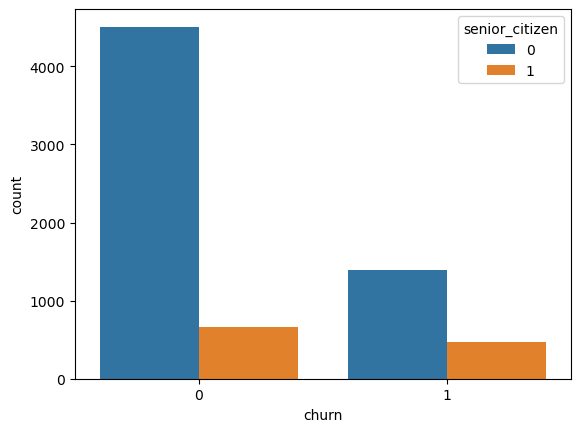

In [45]:
# Plot displays senior citizen (1) vs non-senior citizen (0)
# Plot displays churn (1) vs do not churn (0)
sns.countplot(x='churn', hue='senior_citizen', data=telco)


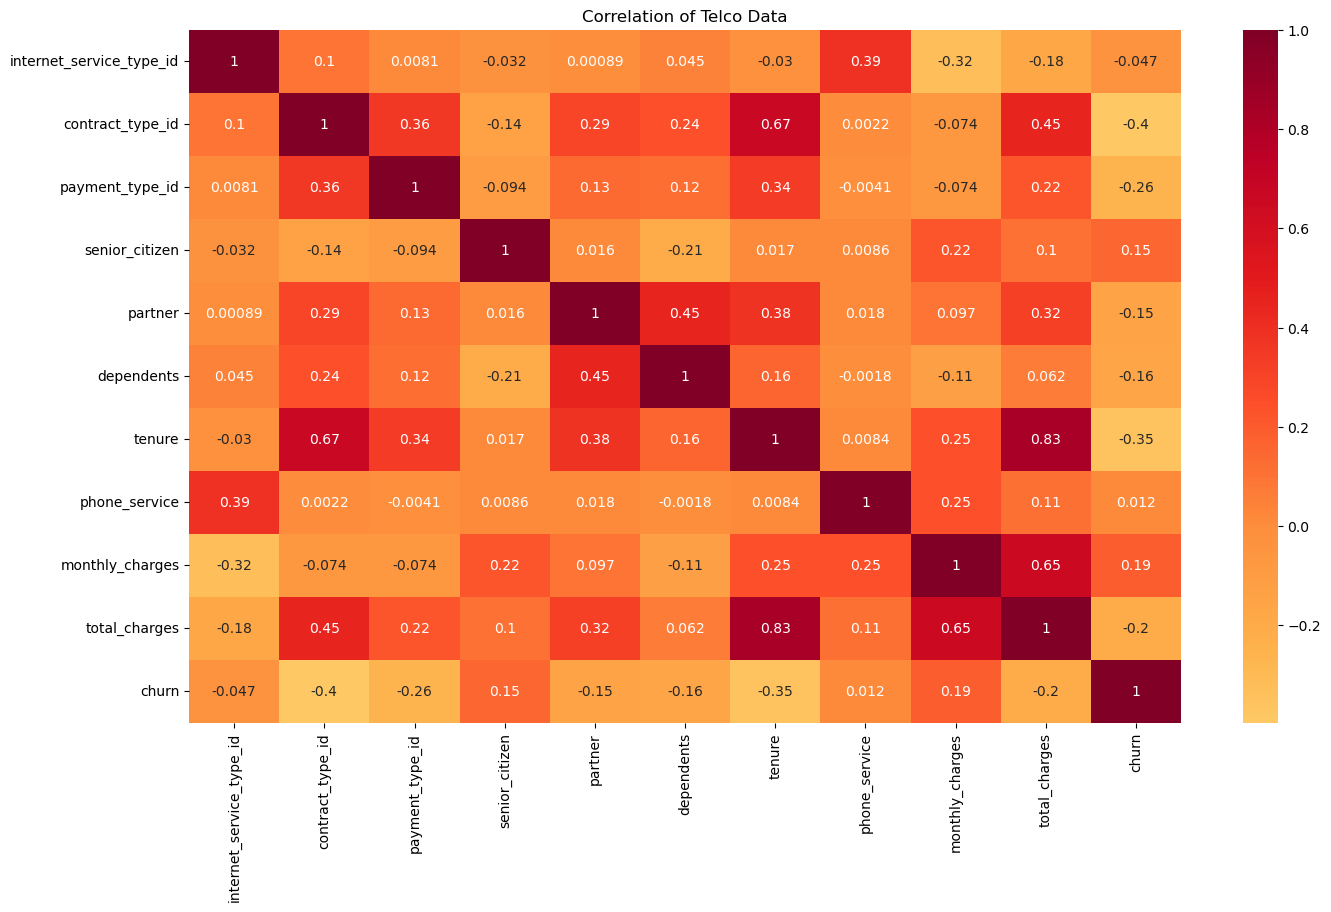

In [30]:
# Heatmap viual to show data correlation 
plt.figure(figsize=(16,9))

sns.heatmap(telco.corr(), cmap='YlOrRd', center=0, annot=True)

plt.title('Correlation of Telco Data')

plt.show()

_______

## Modeling/ Testing

### Finding the best  model 
- churn and senior_citizen are both categorical
- 2 discrete variables
- use chi2 testing

In [31]:
# Create confusion matrix
observed = pd.crosstab(telco.churn, telco.senior_citizen)
observed

senior_citizen,0,1
churn,,
0,4508,666
1,1393,476


## Hypothosis:

- **$H_{0}$**: there is no relationship between churn and customer age
<br>

- **$H_{a}$**: there is a relationshp between churn and customer age
<br>

- **True Positive**: Correctly predict there is a relationship and there is a relationship
<br>

- **True Negative**: Correctly Predict there is no relationship and there is not relationship
<br>

- **False Positive**: Incorectly predict there is a relationship and there is no relationship
<br>

- **False Negative**: Incorrectly predict there is no relationship and there is a relationship

In [32]:
# Define alpha
alpha = 0.05

In [33]:
# chi2 contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(159.42630036838742,
 1.510066805092378e-36,
 1,
 array([[4335.05239245,  838.94760755],
        [1565.94760755,  303.05239245]]))

In [34]:
# Streamline data
print('Observed\n')
print(observed.values)
print('---------------------\nExpected\n')
print(expected.astype(int))
print('---------------------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[4508  666]
 [1393  476]]
---------------------
Expected

[[4335  838]
 [1565  303]]
---------------------

chi^2 = 159.4263
p     = 0.0000


In [35]:
if p< alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


### We reject $H_0$. We believe that there is a relationship between churn and customer age

_________________________________

### Train Split

In [36]:
import prepare
import acquire

In [37]:
# Create train,validate and test datasets

train, test = train_test_split(telco, test_size=.2, random_state=123)
train, validate = train_test_split(train, test_size=.3, random_state=123)

In [38]:
## Explore and graph with JUST train set

In [39]:
## crosstab, confusion matrix

In [40]:
pd.crosstab(train.churn, train.model5)

AttributeError: 'DataFrame' object has no attribute 'model5'

In [ ]:
# make baseline

In [ ]:
X_col= ['senior_citizen','tenure', 'internet_service_type_id', 'contract_type_id']
y_col= 'churn'

In [ ]:
X_train = train[X_col]
y_train= train[y_col]

X_validate = validate[X_col]
y_validate= validate[y_col]

X_test = test[X_col]
y_test= test[y_col]